In [22]:
%time
import os
import keras
from keras.datasets import mnist
from kohonen_sup import TrnParams as Trn
from kohonen_sup import KohonenSup as KohonenClass

#from sklearn import datasets
#from sklearn import cross_validation
#from sklearn import preprocessing
#from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


In [23]:
(x_train, y_train), (x_test, y_test) = mnist.load_data();

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#training set
classes = np.unique(y_train)
n_samples = 200; #n_samples for each class

for i in range(len(classes)):
    x_train_i = x_train[y_train==i][0:n_samples]
    if (i==0):
        x_train_new = x_train_i
    else:
        x_train_new = np.concatenate((x_train_new, x_train_i), axis=0)

#labels training set
for i in range(len(classes)):
    y_train_i = y_train[y_train==i][0:n_samples]
    if (i==0):
        y_train_new = y_train_i
    else:
        y_train_new = np.concatenate((y_train_new, y_train_i), axis=0)
        
#test set
classes = np.unique(y_test)
n_samples_test = 20; #n_samples for each class

for i in range(len(classes)):
    x_test_i = x_test[y_test==i][0:n_samples_test]
    if (i==0):
        x_test_new = x_test_i
    else:
        x_test_new = np.concatenate((x_test_new, x_test_i), axis=0)

# labels test set
for i in range(len(classes)):
    y_test_i = y_test[y_test==i][0:n_samples_test]
    if (i==0):
        y_test_new = y_test_i
    else:
        y_test_new = np.concatenate((y_test_new, y_test_i), axis=0)

        
x_train = x_train_new
y_train = y_train_new
x_test = x_test_new
y_test = y_test_new


#normalization
x_train /= 255 
x_test /= 255

classes = np.unique(y_train);
num_classes = len(classes)

#convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

(2000, 'train samples')
(200, 'test samples')


In [24]:
#train Supervised Kohonen Map

trn_params = Trn.TrnParams()

trn_params.learning_rate = 0.01

#kohonen_obj = KohonenClass.KohonenSup(W0=np.array([np.mean(data[trgt==0], axis=0), np.mean(data[trgt==1], axis=0)]))
kohonen_obj = KohonenClass.KohonenSup()
kohonen_obj.fit(data=x_train,trgt=y_train.astype(int),trn_params=trn_params)
output = kohonen_obj.predict(data=x_train)

Class KohonenSup TrnParams
Learning Rate: 0.01000
Verbose: False
Number of events: 2000


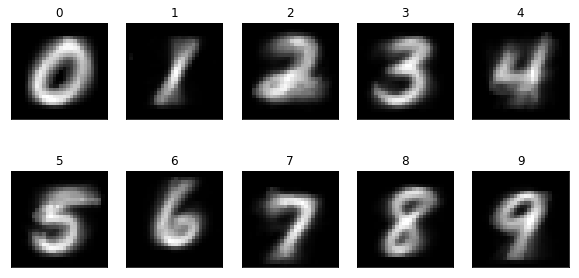

In [25]:
# plot cluster centers

cluster_centers = kohonen_obj.clusters
n_clusters = np.shape(cluster_centers)[0]
most_freq = np.zeros(n_clusters)
freq = np.zeros([n_clusters, len(np.unique(y_train))])

for icluster in range(n_clusters):
    id_clusters = np.unique(output).astype(int)
    labels = y_train[output==id_clusters[icluster]]
    
    for iclass in range(len(np.unique(y_train))):
        freq[icluster,iclass]=np.sum(labels==iclass)
    
    most_freq[icluster] = np.argmax(np.bincount(labels))
    
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1

nrows = 2
ncols = 5
irow = 0
icolumn = 0
fig, ax = plt.subplots(figsize=(10,5),nrows=nrows, ncols=ncols)

for cluster in range(np.shape(cluster_centers)[0]):
    img = cluster_centers[cluster];
    img = img.reshape(28,28);

    ax[irow,icolumn].imshow(img,cmap='gray',interpolation="nearest")
    ax[irow,icolumn].set_title(str(int(most_freq[cluster])))
    ax[irow,icolumn].get_xaxis().set_visible(False)
    ax[irow,icolumn].get_yaxis().set_visible(False)
    
    if (icolumn+1 == ncols):
        icolumn = 0
        irow = irow + 1
    else:
        icolumn = icolumn + 1
        
if cluster < (nrows*ncols):
    for i in range(cluster,nrows*ncols-1):
        ax[irow,icolumn].set_visible(False)
        
        if (icolumn+1 == ncols):
            icolumn = 0
            irow = irow + 1
        else:
            icolumn = icolumn + 1

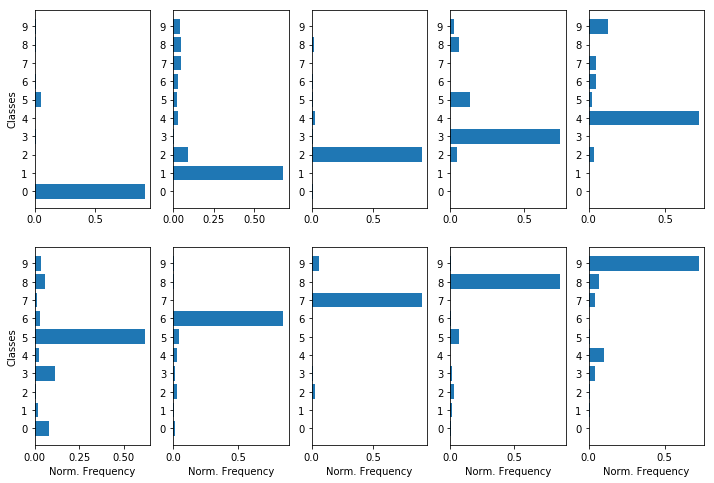

In [26]:
#showing cluster frequencies
cluster_centers = kohonen_obj.clusters
n_clusters = np.shape(cluster_centers)[0]
most_freq = np.zeros(n_clusters)
freq = np.zeros([n_clusters, len(np.unique(y_train))])

for icluster in range(n_clusters):
    id_clusters = np.unique(output).astype(int)
    labels = y_train[output==id_clusters[icluster]]
    
    for iclass in range(len(np.unique(y_train))):
        freq[icluster,iclass]=np.sum(labels==iclass)
    
    most_freq[icluster] = np.argmax(np.bincount(labels))
    
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1

nrows = 2
ncols = 5
irow = 0
icolumn = 0
fig, ax = plt.subplots(figsize=(12,8),nrows=nrows, ncols=ncols)

for cluster in range(np.shape(cluster_centers)[0]):
    val = freq[cluster,:]/np.sum(freq[cluster,:])
    pos = np.arange(len(np.unique(y_train)))
    
    ax[irow,icolumn].barh(pos,val, align='center')
    ax[irow,icolumn].get_yaxis().set_ticks(pos)
    if (irow==nrows-1):
        ax[irow,icolumn].set_xlabel('Norm. Frequency')
    if (icolumn==0):
        ax[irow,icolumn].set_ylabel('Classes')

    if (icolumn+1 == ncols):
        icolumn = 0
        irow = irow + 1
    else:
        icolumn = icolumn + 1

if cluster < (nrows*ncols):
    for i in range(cluster,nrows*ncols-1):
        ax[irow,icolumn].set_visible(False)
        
        if (icolumn+1 == ncols):
            icolumn = 0
            irow = irow + 1
        else:
            icolumn = icolumn + 1

